In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import constants



In [2]:
columns = constants.KEYS + constants.METRICS
legends = ["No processing", "Spellchecking (direct)", "Spellchecking (segmentation)", "Spellchecking (compound)", "Threshold (simple)",
          "Threshold (gaussian)", "Threshold (mean)", "Threshold (otsu)", "Blur (average)", "Blur (gaussian)", "Blur (median)",
          "Blur (bilateral)", "Dewarp (lazy)", "Dewarp (powell)", "Dewarp (l-bfgs-b)"]
filename = "../results/results"

In [3]:
df = pd.read_csv(filename, names=columns, index_col=False)

In [4]:
df.loc[df.wer > 1, 'wer'] = 1

Text(0.5, 1.0, 'Dewarp')

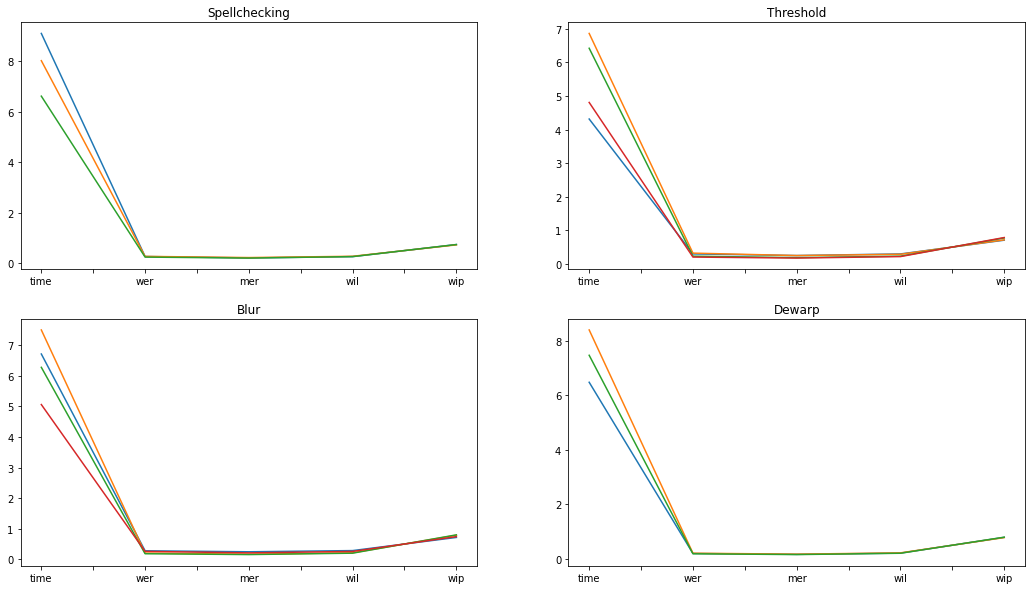

In [5]:
metrics = df.iloc[:, 11:]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i in range(1, 4):
    metrics[i::15].mean().plot(ax=axes[0, 0])
    
for i in range(4, 8):
    metrics[i::15].mean().plot(ax=axes[0, 1])
    
for i in range(8, 12):
    metrics[i::15].mean().plot(ax=axes[1, 0])
    
for i in range(12, 15):
    metrics[i::15].mean().plot(ax=axes[1, 1])
    
axes[0, 0].set_title('Spellchecking')
axes[0, 1].set_title('Threshold')
axes[1, 0].set_title('Blur')
axes[1, 1].set_title('Dewarp')

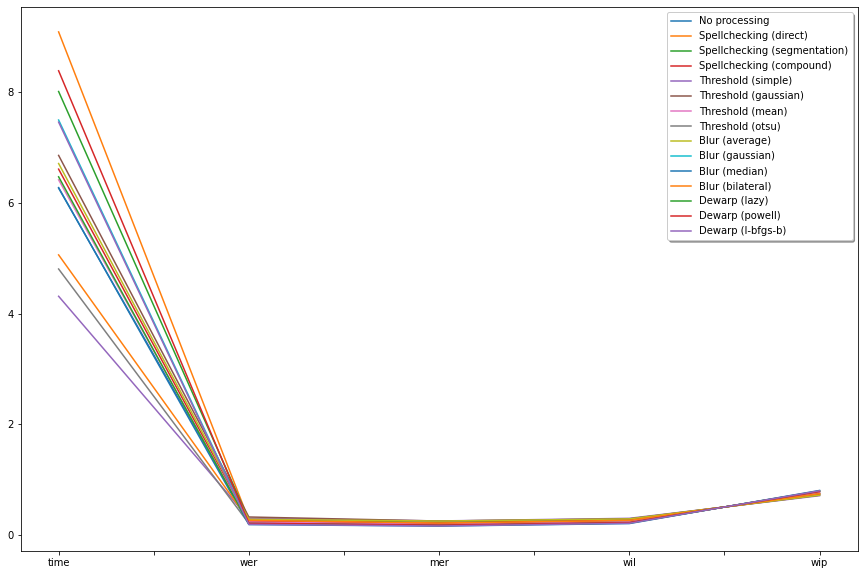

In [6]:
results = pd.DataFrame(columns=['wer', 'mer', 'wil', 'wip', 'time'])

for i in range(15):
    mean = metrics[i::15].mean().rename(legends[i])
    results = results.append(mean)
    mean.plot(figsize=(15, 10))
plt.legend(legends, fancybox=True, shadow=True)

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

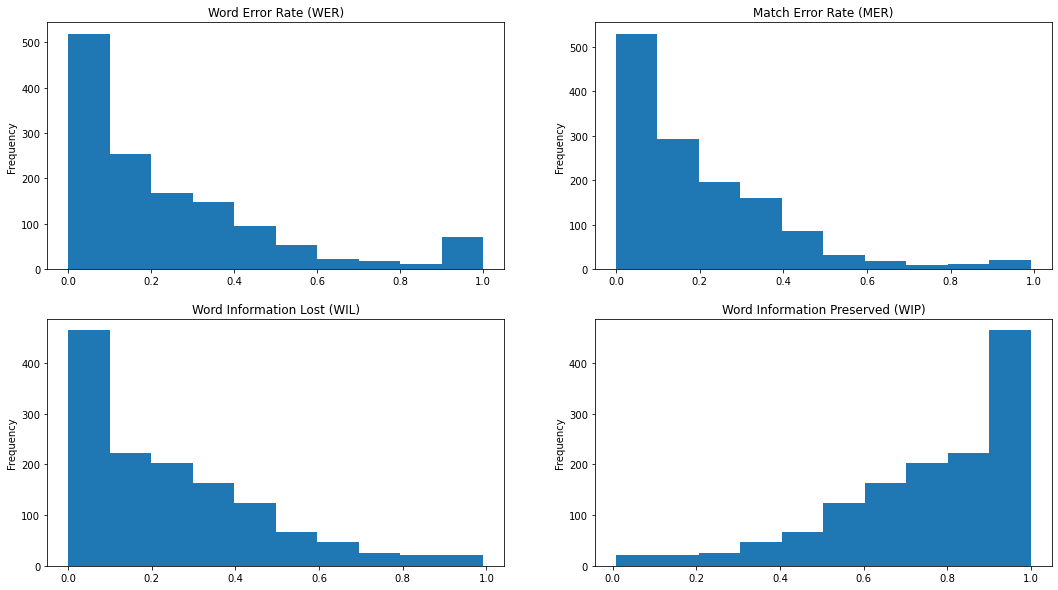

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

df['wer'].plot.hist(ax=axes[0, 0])
df['mer'].plot.hist(ax=axes[0, 1])
df['wil'].plot.hist(ax=axes[1, 0])
df['wip'].plot.hist(ax=axes[1, 1])

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

Text(0.5, 1.0, 'Word Information Preserved (WIP)')

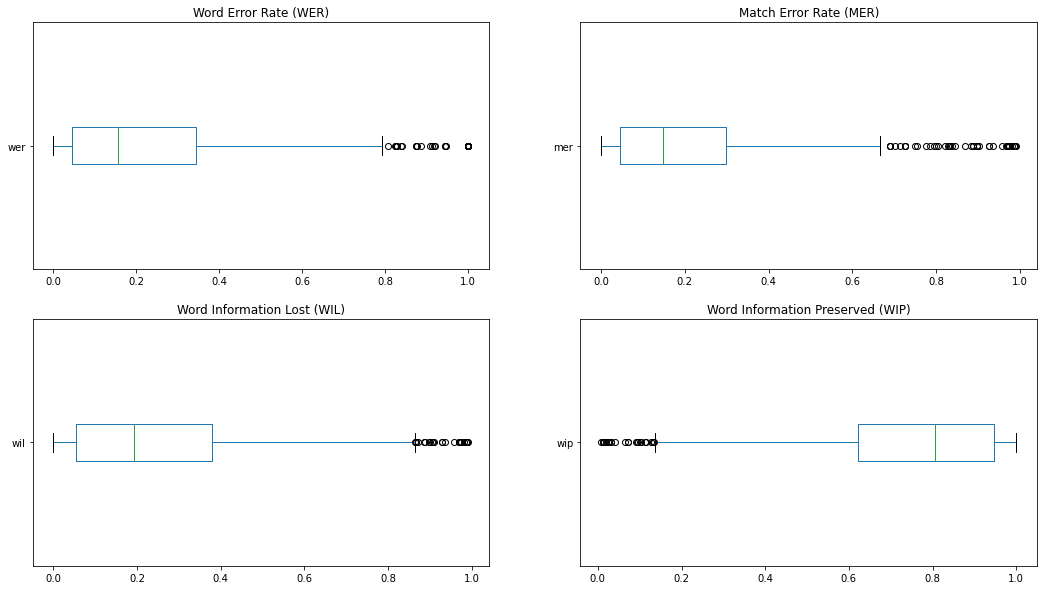

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

df['wer'].plot.box(ax=axes[0, 0], vert=False)
df['mer'].plot.box(ax=axes[0, 1], vert=False)
df['wil'].plot.box(ax=axes[1, 0], vert=False)
df['wip'].plot.box(ax=axes[1, 1], vert=False)

axes[0, 0].set_title('Word Error Rate (WER)')
axes[0, 1].set_title('Match Error Rate (MER)')
axes[1, 0].set_title('Word Information Lost (WIL)')
axes[1, 1].set_title('Word Information Preserved (WIP)')

In [9]:
results

,wer,mer,wil,wip,time
No processing,0.237126,0.195223,0.248460,0.751540,6.269189
Spellchecking (direct),0.265565,0.208860,0.260676,0.739324,9.095800
Spellchecking (segmentation),0.269975,0.223292,0.274107,0.725893,8.017363
Spellchecking (compound),0.242112,0.203822,0.262014,0.737986,6.612957
Threshold (simple),0.296070,0.248040,0.295158,0.704842,4.312745
Threshold (gaussian),0.319568,0.246505,0.285241,0.714759,6.861304
Threshold (mean),0.228398,0.185174,0.228995,0.771005,6.419711
Threshold (otsu),0.201879,0.172593,0.216420,0.783580,4.806309
Blur (average),0.278390,0.246134,0.284986,0.715014,6.714651
Blur (gaussian),0.203796,0.165495,0.211805,0.788195,7.501577


<AxesSubplot:>

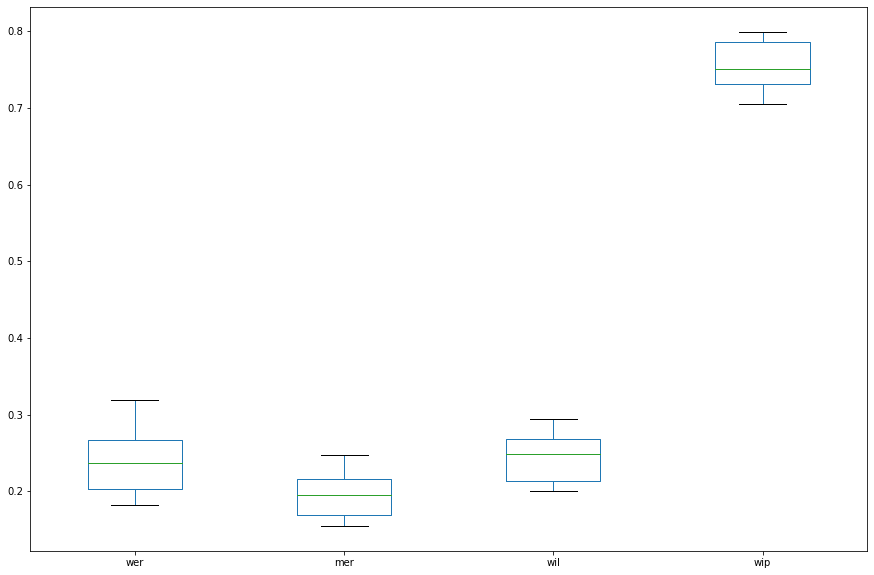

In [10]:
# results.loc[results['wip'].idxmax()]
# results.loc[results['wer'].idxmin()]
# results.loc[results['wil'].idxmin()]
# results.loc[results['mer'].idxmin()]
# results.loc[results['time'].idxmin()]
results.iloc[:, :-1].plot.box(figsize=(15, 10))

In [14]:
df.loc[df['wer'] > 0.9]

,image_path,dictionary,bigram,lang,correction_mode,improve_image,thresh_mode,blur_mode,dewarp,optimizer,transform_mode,time,wer,mer,wil,wip
38,../icdar2015/images/00706.jpg,None,None,eng,simple,True,disable,average,False,disable,extended,4.582399,1.000000,0.702212,0.843496,0.156504
70,../icdar2015/images/00063.jpg,None,None,eng,simple,True,disable,median,False,disable,extended,5.566971,0.906386,0.499672,0.530302,0.469698
71,../icdar2015/images/00063.jpg,None,None,eng,simple,True,disable,bilateral,False,disable,extended,4.750659,0.916073,0.507902,0.549891,0.450109
83,../icdar2015/images/02313.jpg,None,None,eng,simple,True,disable,average,False,disable,extended,1.840663,1.000000,0.988742,0.988742,0.011258
84,../icdar2015/images/02313.jpg,None,None,eng,simple,True,disable,gaussian,False,disable,extended,3.616040,1.000000,0.585549,0.623924,0.376076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,../icdar2015/images/02575.jpg,None,None,eng,simple,True,gaussian,disable,False,disable,extended,4.521558,1.000000,0.755363,0.780588,0.219412
1307,../icdar2015/images/01035.jpg,None,None,eng,simple,True,disable,average,False,disable,extended,2.345463,1.000000,0.898715,0.904984,0.095016
1308,../icdar2015/images/01035.jpg,None,None,eng,simple,True,disable,gaussian,False,disable,extended,4.898776,1.000000,0.664454,0.815485,0.184515
1310,../icdar2015/images/01035.jpg,None,None,eng,simple,True,disable,bilateral,False,disable,extended,2.292635,1.000000,0.897765,0.906921,0.093079
